### Preprocessing the data for Recommendation System

**Dataset used**
* **The Small Dataset:** Comprises of 100,000 ratings and 1,300 tag applications applied to 9,000 movies by 700 users.
* **movies_metadata.csv:** The main Movies Metadata file. Contains information on 9000 movies featured in the Small MovieLens dataset. Features include posters, backdrops, budget, revenue, release dates, languages, production countries and companies.
* **links_small.csv:** The file that contains the TMDB and IMDB IDs of all the movies featured in the Small MovieLens dataset.
* **credits.csv:** Consists of Cast and Crew Information for all our movies.
* **ratings_small.csv:** The subset of 100,000 ratings from 700 users on 9,000 movies
* **keywords.csv:** Contains the movie plot keywords for our MovieLens movies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
movies_md = pd.read_csv('Dataset/movies_metadata.csv')
movies_links = pd.read_csv('Dataset/links_small.csv')
movies_credits = pd.read_csv('Dataset/credits.csv')
movies_ratings = pd.read_csv('Dataset/ratings_small.csv')
movies_keywords = pd.read_csv('Dataset/keywords.csv')

C:\Users\Admin\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
movies_md.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


In [4]:
movies_md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
movies_links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [6]:
movies_links.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9125 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  9125 non-null   int64  
 1   imdbId   9125 non-null   int64  
 2   tmdbId   9112 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 214.0 KB


In [7]:
movies_credits.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [8]:
movies_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [9]:
movies_ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [10]:
movies_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [11]:
movies_keywords.head()

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


In [12]:
movies_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [13]:
movies_links.rename(columns = {'tmdbId':'id'}, inplace = True)
movies_links = movies_links[movies_links['id'].notnull()]
movies_links['id'] = movies_links['id'].astype('int')
movies_links.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9112 entries, 0 to 9124
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   movieId  9112 non-null   int64
 1   imdbId   9112 non-null   int64
 2   id       9112 non-null   int32
dtypes: int32(1), int64(2)
memory usage: 249.2 KB


<AxesSubplot:>

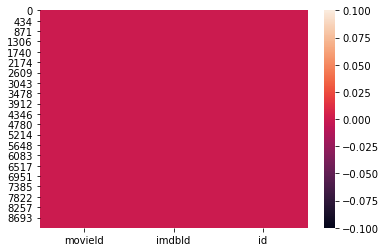

In [14]:
sns.heatmap(movies_links.isnull())

In [15]:
movies_links.head()

,movieId,imdbId,id
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [16]:
def convert_int(x):
    try:
        return int(x)
    except:
        return np.nan
    
movies_md['id'] = movies_md['id'].apply(convert_int)
movies_md[movies_md['id'].isnull()]

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
19730,- Written by Ørnås,0.065736,/ff9qCepilowshEtG2GYWwzt2bs4.jpg,"[{'name': 'Carousel Productions', 'id': 11176}...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",NaN,0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29503,Rune Balot goes to a casino connected to the ...,1.931659,/zV8bHuSL6WXoD6FWogP9j4x80bL.jpg,"[{'name': 'Aniplex', 'id': 2883}, {'name': 'Go...","[{'iso_3166_1': 'US', 'name': 'United States o...",NaN,0,68.0,"[{'iso_639_1': 'ja', 'name': '日本語'}]",Released,...,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35587,Avalanche Sharks tells the story of a bikini ...,2.185485,/zaSf5OG7V8X8gqFvly88zDdRm46.jpg,"[{'name': 'Odyssey Media', 'id': 17161}, {'nam...","[{'iso_3166_1': 'CA', 'name': 'Canada'}]",NaN,0,82.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,...,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
movies_md.drop([19730,29503,35587],inplace=True)
movies_md.drop_duplicates(subset = ['id'],inplace=True)
movies_md.shape

(45433, 24)

In [18]:
movies_smd = pd.merge(movies_links, movies_md, on = 'id',how='left')
movies_smd.shape

(9112, 26)

In [19]:
movies_smd.columns

Index(['movieId', 'imdbId', 'id', 'adult', 'belongs_to_collection', 'budget',
       'genres', 'homepage', 'imdb_id', 'original_language', 'original_title',
       'overview', 'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'video',
       'vote_average', 'vote_count'],
      dtype='object')

In [20]:
movies_smd = movies_smd[['movieId','id','genres','title',]]
movies_smd.head()

,movieId,id,genres,title
0,1,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story
1,2,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji
2,3,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men
3,4,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale
4,5,11862,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II


In [21]:
movies_credits.drop_duplicates(subset = ['id'],inplace=True)
movies_smd = pd.merge(movies_smd, movies_credits, on = 'id',how='left')
movies_smd.head()

,movieId,id,genres,title,cast,crew
0,1,862,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",Toy Story,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de..."
1,2,8844,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",Jumanji,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de..."
2,3,15602,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",Grumpier Old Men,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de..."
3,4,31357,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",Waiting to Exhale,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de..."
4,5,11862,"[{'id': 35, 'name': 'Comedy'}]",Father of the Bride Part II,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de..."


<AxesSubplot:>

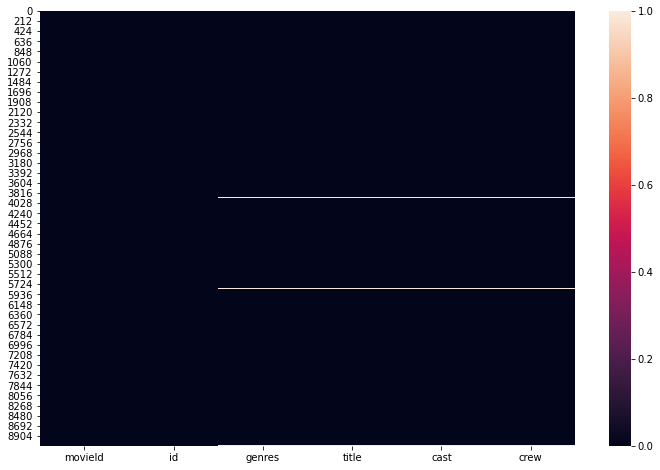

In [22]:
plt.figure(figsize=(12,8))
sns.heatmap(movies_smd.isnull())

In [23]:
movies_smd.dropna(inplace=True)
movies_smd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9082 entries, 0 to 9109
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9082 non-null   int64 
 1   id       9082 non-null   int32 
 2   genres   9082 non-null   object
 3   title    9082 non-null   object
 4   cast     9082 non-null   object
 5   crew     9082 non-null   object
dtypes: int32(1), int64(1), object(4)
memory usage: 461.2+ KB


In [24]:
movies_smd['genre'] = movies_smd['genres'].apply(lambda x: [i['name'] for i in eval(x)])
movies_smd['actor']=movies_smd['cast'].apply(lambda x: [i['name'] for i in eval(x)])

def director(col):
    for i in eval(col):
        if i['job']=='Director':
            return i['name']

movies_smd['director']=movies_smd['crew'].apply(director)
movies_smd.drop(['id','genres','cast','crew'],inplace = True,axis=1)
movies_smd.head()

,movieId,title,genre,actor,director
0,1,Toy Story,"[Animation, Comedy, Family]","[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",John Lasseter
1,2,Jumanji,"[Adventure, Fantasy, Family]","[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",Joe Johnston
2,3,Grumpier Old Men,"[Romance, Comedy]","[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",Howard Deutch
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]","[Whitney Houston, Angela Bassett, Loretta Devi...",Forest Whitaker
4,5,Father of the Bride Part II,[Comedy],"[Steve Martin, Diane Keaton, Martin Short, Kim...",Charles Shyer


In [25]:
users_df = pd.DataFrame(movies_ratings['userId'].unique(), columns=['userId'])
movies_df = movies_smd[['movieId','title']]

In [26]:
movies_genres = movies_smd[['movieId','genre']]

#define a function to split genres field
def get_movie_genres(movieId):
    movie = movies_genres[movies_genres['movieId']==movieId]
    genre = movie['genre'].tolist()
    df = pd.DataFrame([b for a in genre for b in a], columns=['genre'])
    df.insert(loc=0, column='movieId', value=movieId)
    return df

#create empty df
movies_genres_df = pd.DataFrame(columns=['movieId','genre'])
for x in movies_genres['movieId'].tolist():
    movies_genres_df=movies_genres_df.append(get_movie_genres(x))
movies_genres_df.head()

,movieId,genre
0,1,Animation
1,1,Comedy
2,1,Family
0,2,Adventure
1,2,Fantasy


In [27]:
ratings_df = movies_ratings.drop('timestamp',axis=1)
ratings_df = ratings_df[ratings_df['movieId'].isin(movies_genres_df['movieId'])]
genres_df = pd.DataFrame(movies_genres_df['genre'].unique(), columns=['genre'])

#### Train and Test split based on Rating links

In [28]:
from sklearn.model_selection import train_test_split
users = users_df['userId'].tolist()
def test_train_split(ratings,users):
    train_set = pd.DataFrame(columns=['userId','movieId','rating'])
    test_set = pd.DataFrame(columns=['userId','movieId','rating'])
    for user in users:
        user_ratings = ratings[ratings['userId'] == user]
        X = user_ratings[['userId','movieId']]
        y = user_ratings[['rating']]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        train_byuser = pd.merge(X_train,y_train,left_index=True,right_index=True)
        test_byuser = pd.merge(X_test,y_test,left_index=True,right_index=True)
        train_set = train_set.append(train_byuser)
        test_set = test_set.append(test_byuser)
    return train_set,test_set

In [29]:
train_set,test_set=test_train_split(ratings_df,users)

In [30]:
quantile = train_set.groupby(by = 'userId',as_index = False).quantile(0.6)

In [31]:
liked_test_set = pd.DataFrame(columns=['userId','movieId','rating'])

In [32]:
for user in users:
    user_ratings = test_set[test_set['userId'] == user]
    threshold = quantile[quantile['userId']==user]['rating']
    user_liked = user_ratings[user_ratings['rating']>=float(threshold)]
    liked_test_set = liked_test_set.append(user_liked)

In [33]:
movies_actors = movies_smd[['movieId','actor']]

#define a function to split actors
def get_movie_actors(movieId):
    movie = movies_actors[movies_actors['movieId']==movieId]
    actor = movie['actor'].tolist()
    df = pd.DataFrame([b for a in actor for b in a], columns=['actor'])
    df.insert(loc=0, column='movieId', value=movieId)
    return df

#create empty df
movies_actors_df = pd.DataFrame(columns=['movieId','actor'])
for x in movies_actors['movieId'].tolist():
    movies_actors_df=movies_actors_df.append(get_movie_actors(x))
movies_actors_df.head()

,movieId,actor
0,1,Tom Hanks
1,1,Tim Allen
2,1,Don Rickles
3,1,Jim Varney
4,1,Wallace Shawn


In [34]:
actors_df = pd.DataFrame(movies_actors_df['actor'].unique(), columns=['actor'])
movies_directors_df = movies_smd[['movieId','director']]
movies_directors_df.dropna(inplace=True)
directors_df = pd.DataFrame(movies_directors_df['director'].unique(), columns=['director'])

<ipython-input-34-4de9bcc90804>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_directors_df.dropna(inplace=True)


* **Storing the dataframes in csv to import in the Neo4j to create nodes and edges for Graph DataBase**

In [35]:
users_df.to_csv('users.csv', header=True, index=False)
movies_df.to_csv('movies.csv', header=True, index=False)
genres_df.to_csv('genres.csv', header=True, index=False)
train_set.to_csv('train_set.csv', header=True, index=False)
liked_test_set.to_csv('liked_test_set.csv', header=True, index=False)
movies_genres_df.to_csv('movies_genres.csv', header=True, index=False)
actors_df.to_csv('actors.csv', header=True, index=False)
directors_df.to_csv('directors.csv', header=True, index=False)
movies_actors_df.to_csv('movies_actors.csv', header=True, index=False)
movies_directors_df.to_csv('movies_directors.csv', header=True, index=False)